In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
#Sciezki do folderow
folder = '../Baza_zdjec/s'
folder_docelowy = './Dane_testowe/'


In [4]:
test_ppl = []    
for i in range(37,41):
    images = []
    for j in range(1,11):
        im = Image.open(folder+str(i)+'/'+str(j)+'.png')
        arr_im = np.array(im) 
        images.append(arr_im) 
    test_ppl.append(images) 

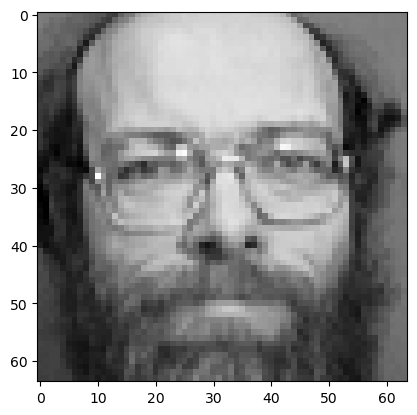

In [5]:
#Probka treningowa

plt.imshow(test_ppl[0][0], cmap = 'gray')

In [7]:
ilosc = 40
rozmiar = 10
test_img = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab_test = np.zeros(360, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy
#if not os.path.exists(newpath):
#    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(4):
    
    #Petla przechodzi po zdjeciach
    for l in range(1):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):

                data = np.concatenate((test_ppl[i][j+l], test_ppl[i][9-k+l]), axis=0)      
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(data)
                con.save(folder_docelowy+str(n)+'.png') 
      
                test_img.append(con)
                tab_test[n] = 1 
                n = n + 1
                
print(n)

180


In [9]:
x = 0 #Zamiast n 

polaczone = n
m = 5
rozne_test = []


for i in range(4):

    rand_1 = random.randint(1,4)
    rand_2 = random.randint(1,4)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(6):
       
            for l in range(5):
            
                data = np.concatenate((test_ppl[i][rand_1+j], test_ppl[i+k][rand_2+l]), axis=0)      
                con = Image.fromarray(data)
                x = x + 1
                rozne_test.append(con)
            
                con.save(newpath+str(n)+'.png')
                
                tab_test[n] = 0
                n = n + 1
            
                #data = np.concatenate((test_ppl[i][(rand_1+2)+j], test_ppl[i+k][(rand_2+2)+l]), axis=0)      
                #con = Image.fromarray(data)
                #x = x + 1
                #rozne_test.append(con)
                            
                    
                #data = np.concatenate((test_ppl[i][(rand_1-2)+j], test_ppl[i+k][(rand_2-2)+l]), axis=0)     
                #con = Image.fromarray(data)
                #x = x + 1
                #rozne_test.append(con)
                   
print(x)
print(n)

180
360


In [17]:
#Zapis tablicy do pliku CSV
tab_test.tofile(newpath+'test_label_clear.csv', sep = ' ') 

1


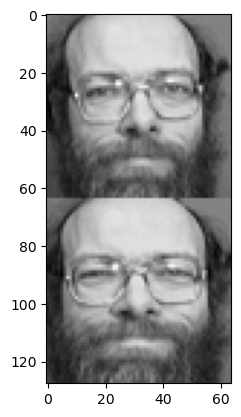

In [12]:
#Probka treningowa
n = 0
print(tab_test[n])
plt.imshow(test_img[n], cmap = 'gray')

0


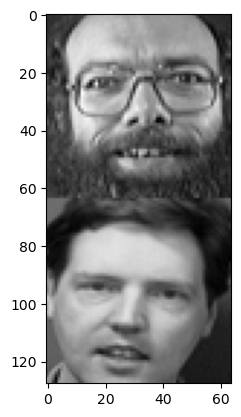

In [16]:
#Probka treningowa
n = 10
print(tab_test[180+n])
plt.imshow(rozne_test[n], cmap = 'gray')